In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import seaborn as sns

from utils import sum_dicts
from plot import plot_results, print_results
from constants import DATASETS, FEATURE_SKEWS, LABEL_SKEWS, QTY_SKEWS,\
    NR_PARTIES

sns.set_theme()

# Results + Evaluation

## Feature skew

### Feature skew - Learning Rate

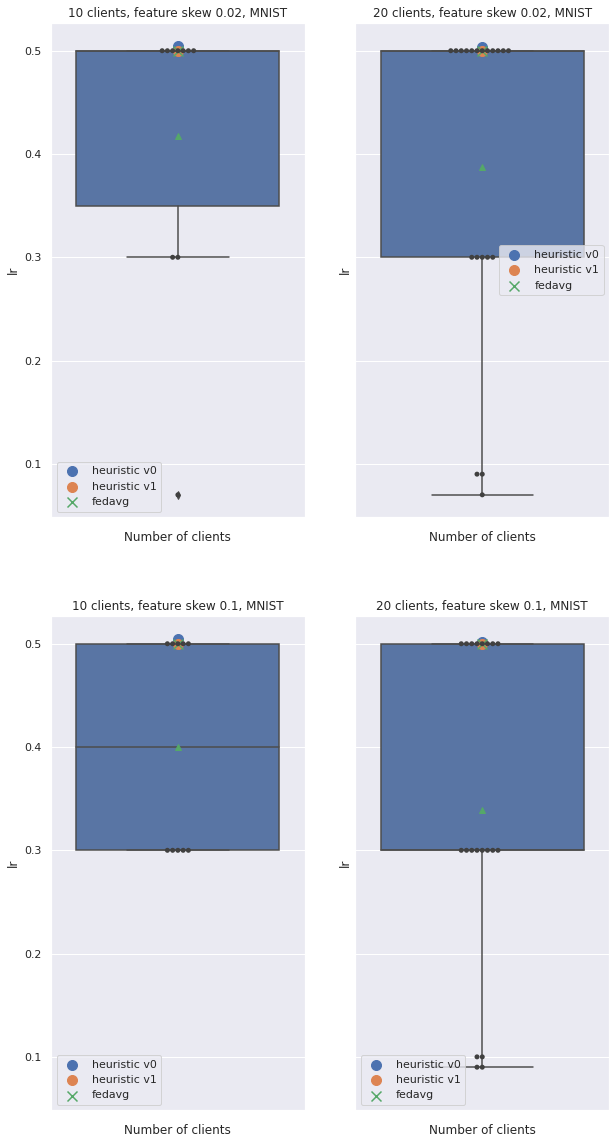

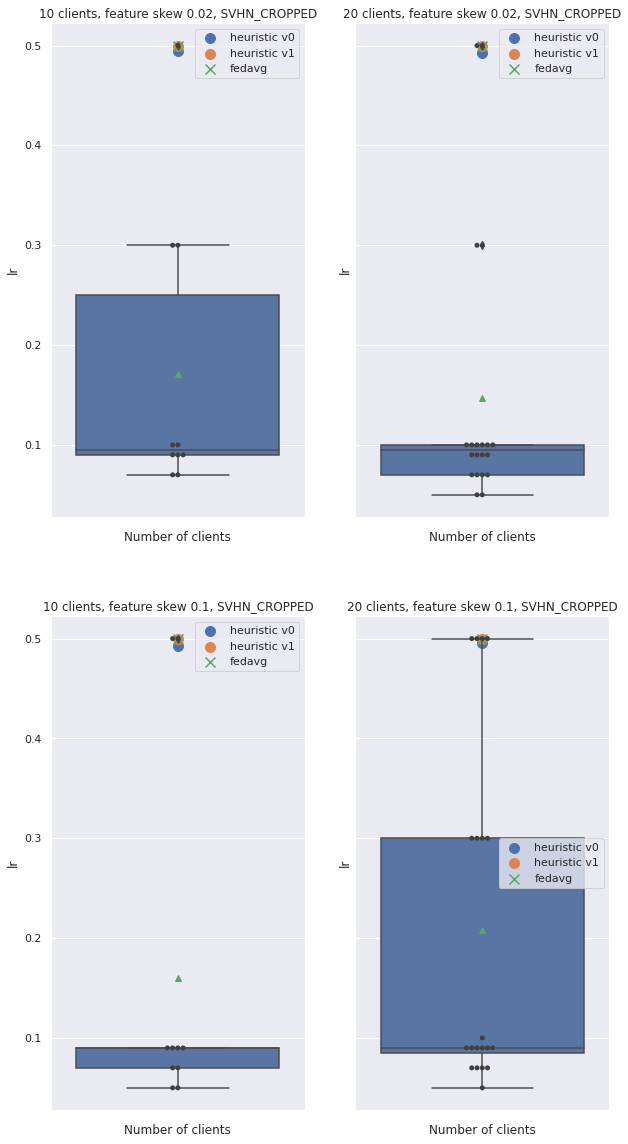

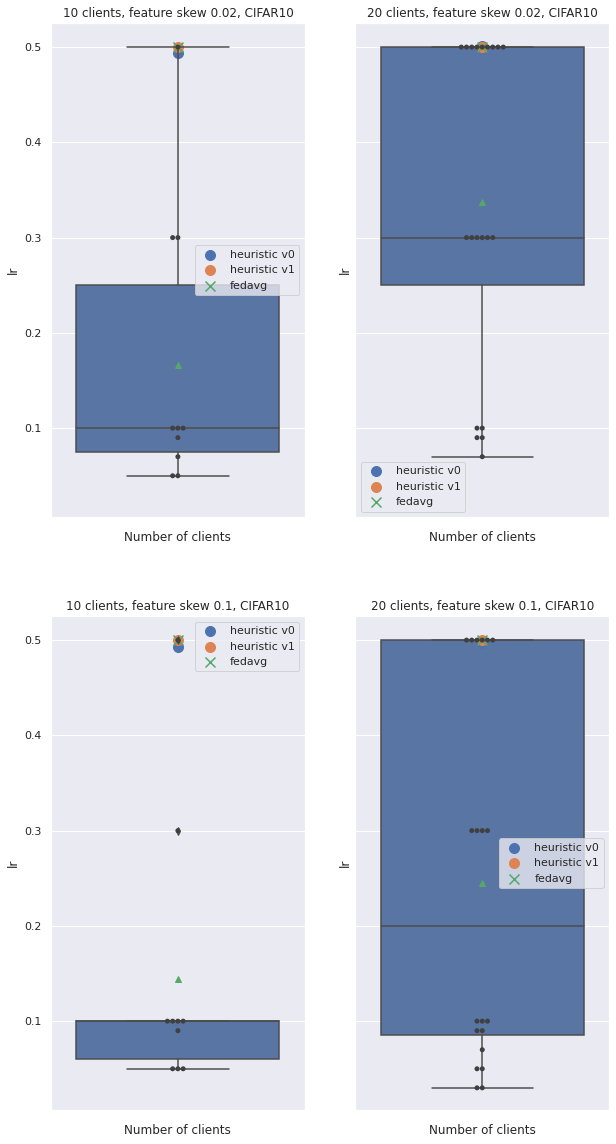

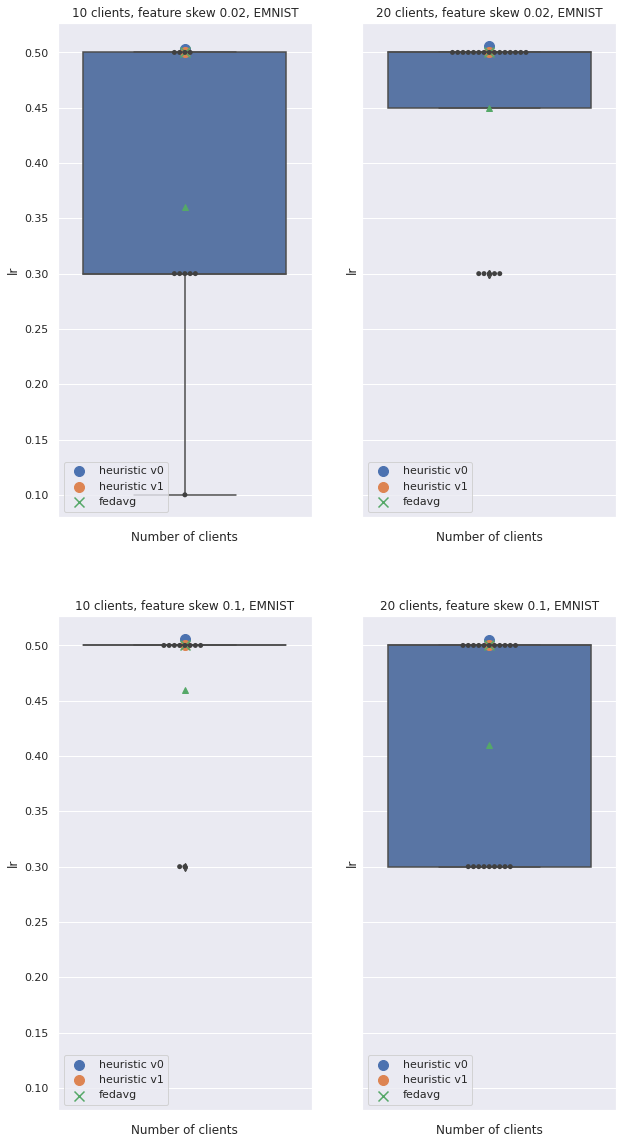

In [3]:
lr_feature_heuristic_es = {}
lr_feature_baseline_es = {}
lr_feature_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = \
        plot_results(d, FEATURE_SKEWS, NR_PARTIES, type_of_skew="feature",
                     hp_name="lr", versions=(0, 1))
    lr_feature_heuristic_es = sum_dicts(lr_feature_heuristic_es, heuristic_es)
    lr_feature_baseline_es = sum_dicts(lr_feature_baseline_es, baseline_es)

    lr_feature_fedavg_results += fedavg_res

In [4]:
print_results(lr_feature_heuristic_es, lr_feature_baseline_es,
              lr_feature_fedavg_results, versions=(0, 1))

([0.5, 0.3, 0.5, 0.3, 0.5, 0.5, 0.07, 0.5, 0.5, 0.5], 0.5)
([0.09, 0.5, 0.09, 0.5, 0.5, 0.5, 0.3, 0.5, 0.5, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3, 0.07, 0.3, 0.5, 0.3, 0.5], 0.5)
([0.3, 0.5, 0.5, 0.3, 0.3, 0.3, 0.5, 0.5, 0.3, 0.5], 0.5)
([0.3, 0.3, 0.09, 0.5, 0.3, 0.5, 0.5, 0.1, 0.09, 0.5, 0.3, 0.3, 0.5, 0.5, 0.3, 0.5, 0.1, 0.3, 0.5, 0.3], 0.5)
([0.09, 0.07, 0.1, 0.3, 0.09, 0.09, 0.3, 0.1, 0.5, 0.07], 0.5)
([0.09, 0.3, 0.1, 0.5, 0.1, 0.05, 0.07, 0.1, 0.07, 0.09, 0.3, 0.1, 0.05, 0.1, 0.5, 0.09, 0.07, 0.1, 0.07, 0.09], 0.5)
([0.09, 0.09, 0.07, 0.5, 0.05, 0.09, 0.07, 0.05, 0.5, 0.09], 0.5)
([0.07, 0.3, 0.3, 0.09, 0.09, 0.5, 0.09, 0.07, 0.5, 0.05, 0.09, 0.1, 0.5, 0.3, 0.09, 0.07, 0.5, 0.07, 0.09, 0.3], 0.5)
([0.5, 0.3, 0.1, 0.3, 0.07, 0.09, 0.05, 0.1, 0.1, 0.05], 0.5)
([0.5, 0.1, 0.3, 0.3, 0.3, 0.07, 0.5, 0.5, 0.5, 0.3, 0.5, 0.5, 0.3, 0.1, 0.09, 0.5, 0.3, 0.5, 0.5, 0.09], 0.5)
([0.1, 0.1, 0.05, 0.5, 0.1, 0.1, 0.05, 0.3, 0.09, 0.05], 0.5)
([0.3, 0.1, 0.3, 0.1, 0.5, 0.3, 0.5, 0.03, 0.5, 0.09, 0.5, 0.

Comments:
- Optimal server learning rate equals 0.5 (largest in grid search) for all settings.

### Feature skew - Momentum Results

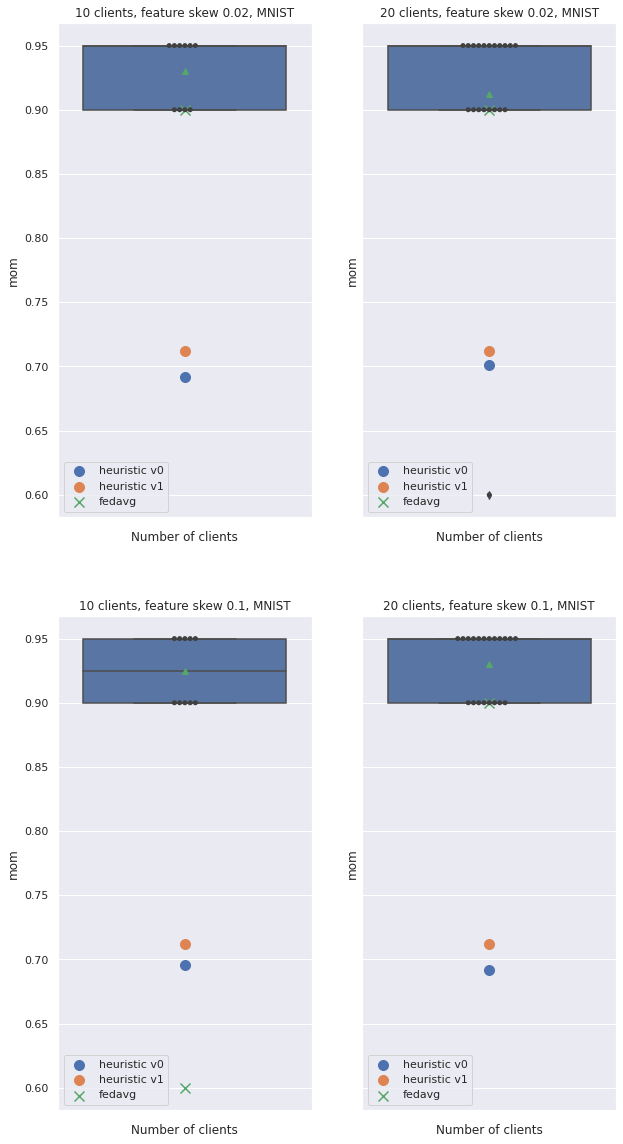

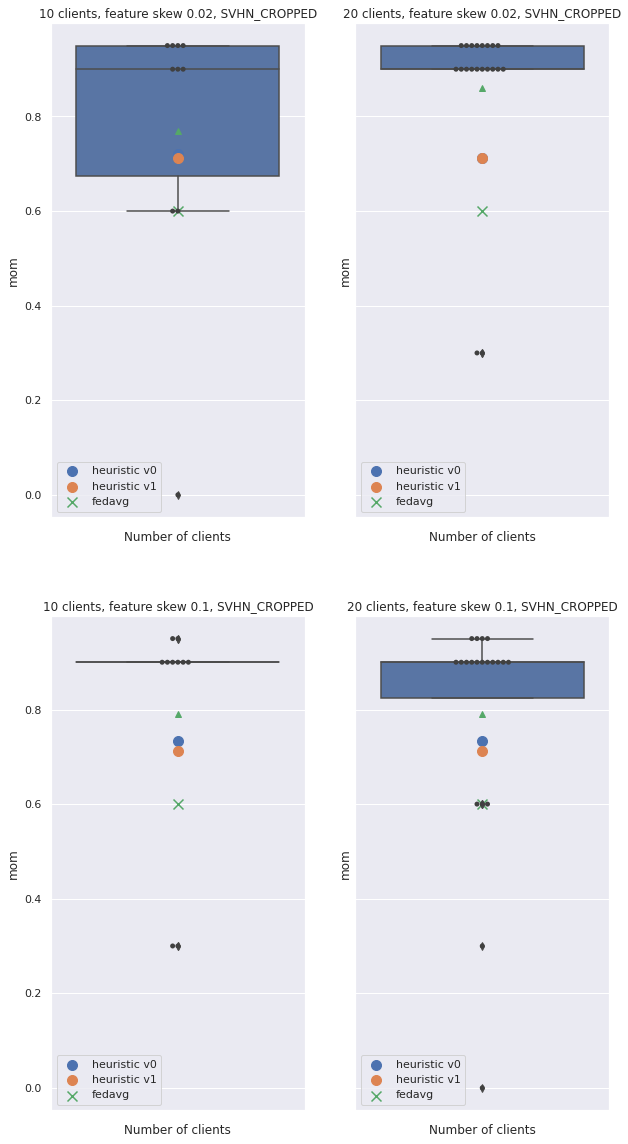

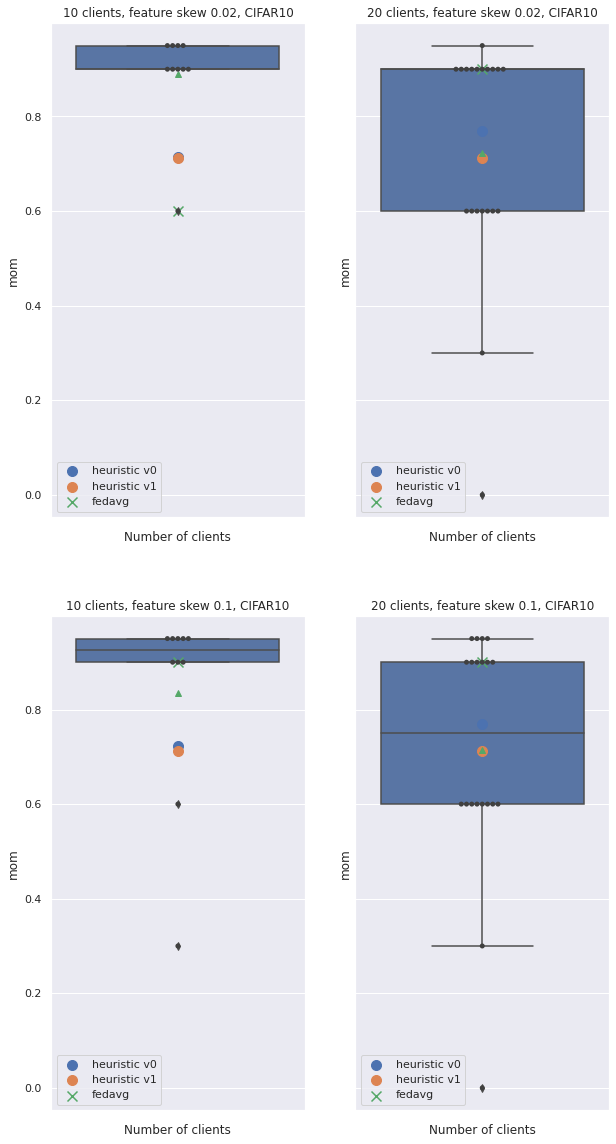

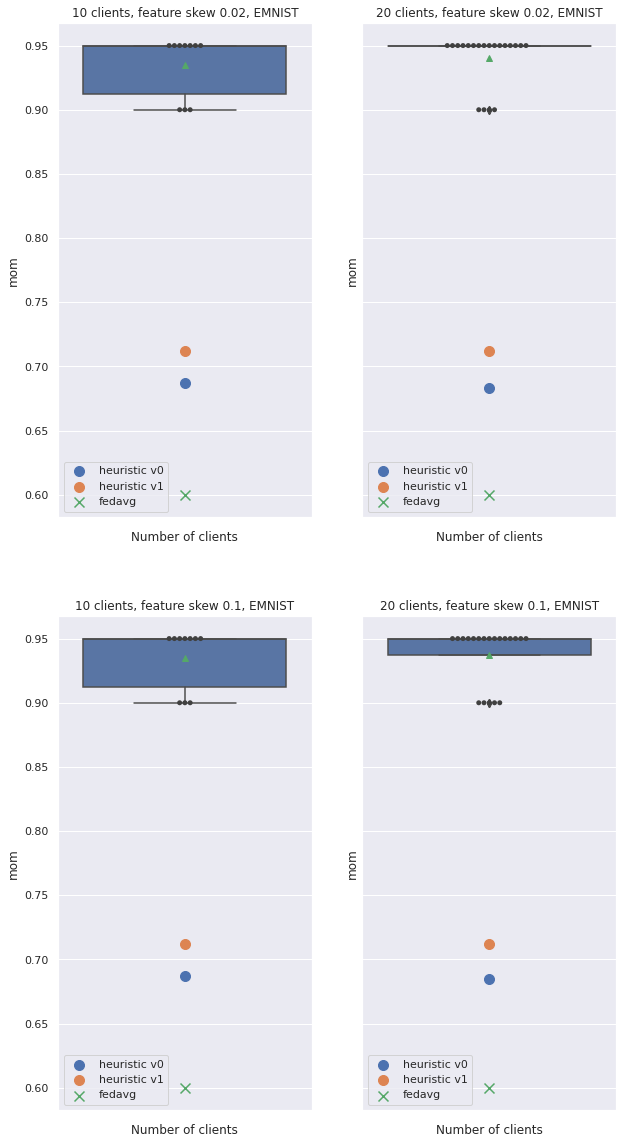

In [5]:
mom_feature_heuristic_es = {}
mom_feature_baseline_es = {}
mom_feature_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = \
        plot_results(d, FEATURE_SKEWS, NR_PARTIES, type_of_skew="feature",
                     hp_name="mom", versions=(0, 1))
    mom_feature_heuristic_es = sum_dicts(
        mom_feature_heuristic_es, heuristic_es)
    mom_feature_baseline_es = sum_dicts(mom_feature_baseline_es, baseline_es)

    mom_feature_fedavg_results += fedavg_res

In [6]:
print_results(mom_feature_heuristic_es, mom_feature_baseline_es,
              mom_feature_fedavg_results, versions=(0, 1))

([0.9, 0.95, 0.95, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.9], 0.9)
([0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.95, 0.9, 0.9, 0.6, 0.95, 0.95, 0.95, 0.95, 0.9, 0.9], 0.9)
([0.95, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.9, 0.9, 0.95], 0.6)
([0.9, 0.95, 0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95], 0.9)
([0.9, 0.95, 0.9, 0.6, 0.95, 0.9, 0.6, 0.95, 0.0, 0.95], 0.6)
([0.9, 0.9, 0.9, 0.3, 0.9, 0.95, 0.95, 0.95, 0.95, 0.9, 0.9, 0.95, 0.95, 0.95, 0.3, 0.9, 0.95, 0.9, 0.9, 0.9], 0.6)
([0.9, 0.9, 0.9, 0.3, 0.95, 0.9, 0.9, 0.95, 0.3, 0.9], 0.6)
([0.9, 0.9, 0.6, 0.9, 0.9, 0.3, 0.9, 0.95, 0.6, 0.9, 0.95, 0.95, 0.0, 0.9, 0.9, 0.9, 0.6, 0.95, 0.9, 0.9], 0.6)
([0.6, 0.9, 0.95, 0.9, 0.95, 0.9, 0.95, 0.9, 0.9, 0.95], 0.6)
([0.3, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.0, 0.6, 0.6, 0.6, 0.6, 0.9, 0.9, 0.9, 0.6, 0.9, 0.6, 0.6, 0.95], 0.9)
([0.9, 0.95, 0.95, 0.3, 0.9, 0.95, 0.9, 0.6, 0.95, 0.95], 0.9)
([0.6, 0.9, 0.95, 0.6, 0.6, 0.6, 0.6, 0.95, 0.0, 0

Comments:
- In EMNIST and SVHN_CROPPED: fedavg momentum tends to be in the 75% percentile of clients' momentums.

### Feature skew - Batch Size Results

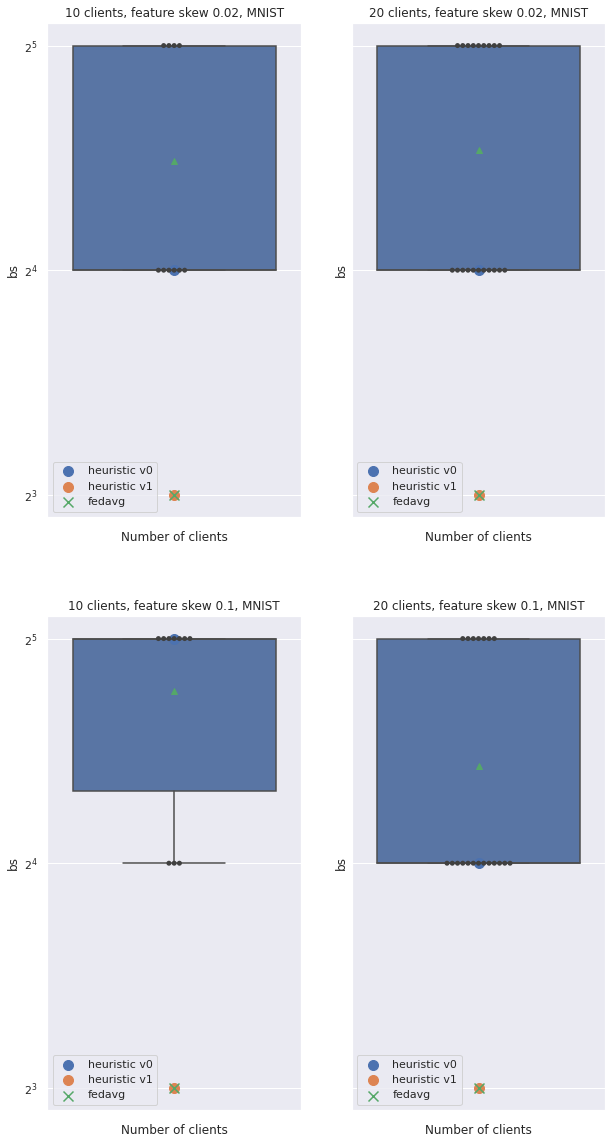

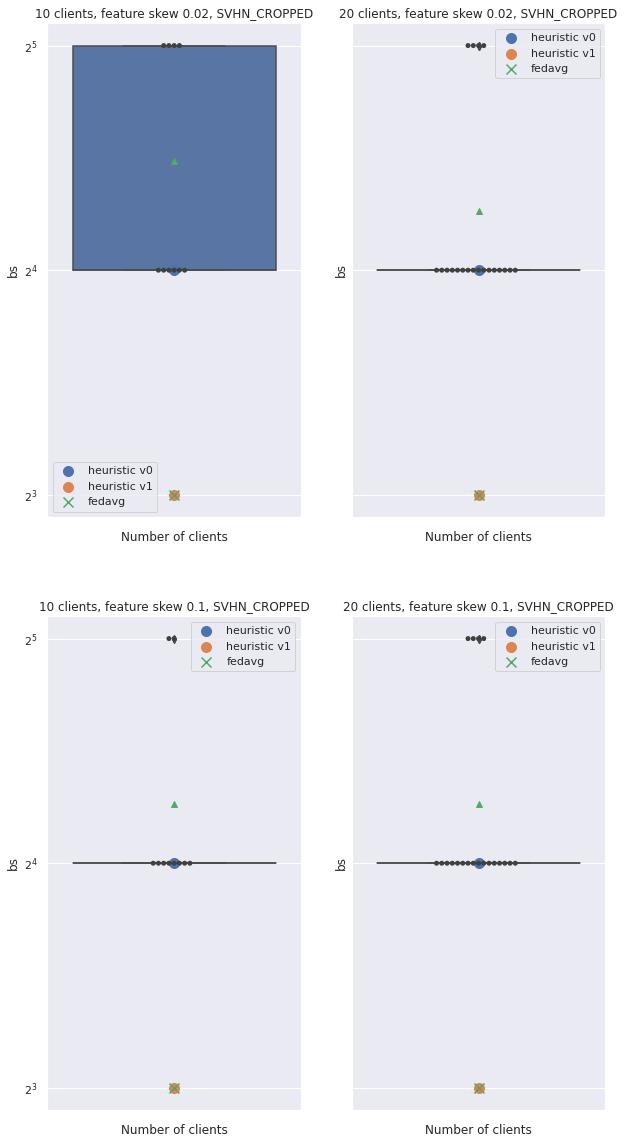

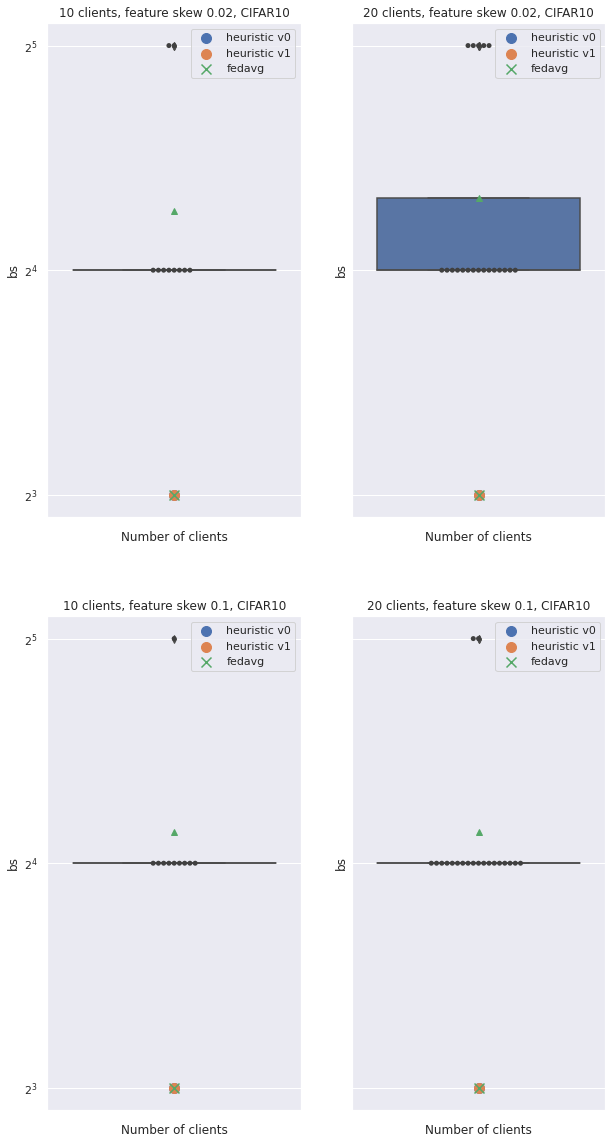

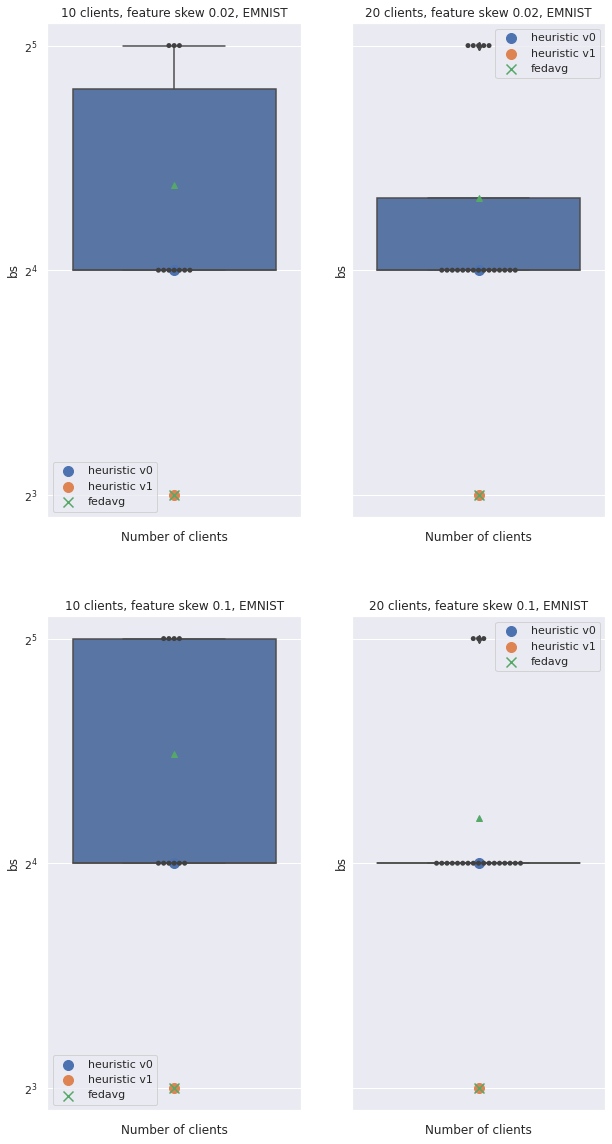

In [7]:
bs_feature_heuristic_es = {}
bs_feature_baseline_es = {}
bs_feature_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = \
        plot_results(d, FEATURE_SKEWS, NR_PARTIES, type_of_skew="feature",
                     hp_name="bs", versions=(0, 1))
    bs_feature_heuristic_es = sum_dicts(bs_feature_heuristic_es, heuristic_es)
    bs_feature_baseline_es = sum_dicts(bs_feature_baseline_es, baseline_es)

    bs_feature_fedavg_results += fedavg_res

In [8]:
print_results(bs_feature_heuristic_es, bs_feature_baseline_es,
              bs_feature_fedavg_results)

([16, 32, 32, 16, 32, 16, 16, 32, 16, 16], 8)
([32, 16, 16, 32, 32, 32, 16, 16, 32, 32, 32, 16, 32, 16, 16, 16, 16, 32, 16, 16], 8)
([32, 16, 32, 16, 32, 16, 32, 32, 32, 32], 8)
([16, 32, 16, 16, 32, 32, 16, 32, 16, 16, 16, 32, 16, 32, 32, 16, 16, 16, 16, 16], 8)
([16, 32, 16, 16, 32, 16, 16, 32, 16, 32], 8)
([16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 32, 16, 16, 32, 16, 16, 16], 8)
([16, 32, 16, 16, 32, 16, 16, 16, 16, 16], 8)
([16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 16, 32], 8)
([16, 32, 16, 32, 16, 16, 16, 16, 16, 16], 8)
([16, 32, 32, 16, 16, 16, 32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 32], 8)
([16, 32, 16, 16, 16, 16, 16, 16, 16, 16], 8)
([16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16], 8)
([32, 16, 16, 32, 16, 16, 32, 16, 16, 16], 8)
([32, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 32, 32, 16, 16, 32, 16, 16], 8)
([16, 16, 16, 32, 16, 16, 16, 32, 32, 32], 8)
([16, 16, 16, 16, 16, 16, 16, 

Comments:
- Mean between two batch sizes does not make sense, since the fedavg batch size is discrete
- Solution: project aggregation result to the closest power of two
- Optimal fedavg batch size equals 8 for all settings.
- Optimal fedavg batch size consistently smaller than client batch sizes.

## Label skew

## Label skew - Learning Rate Results

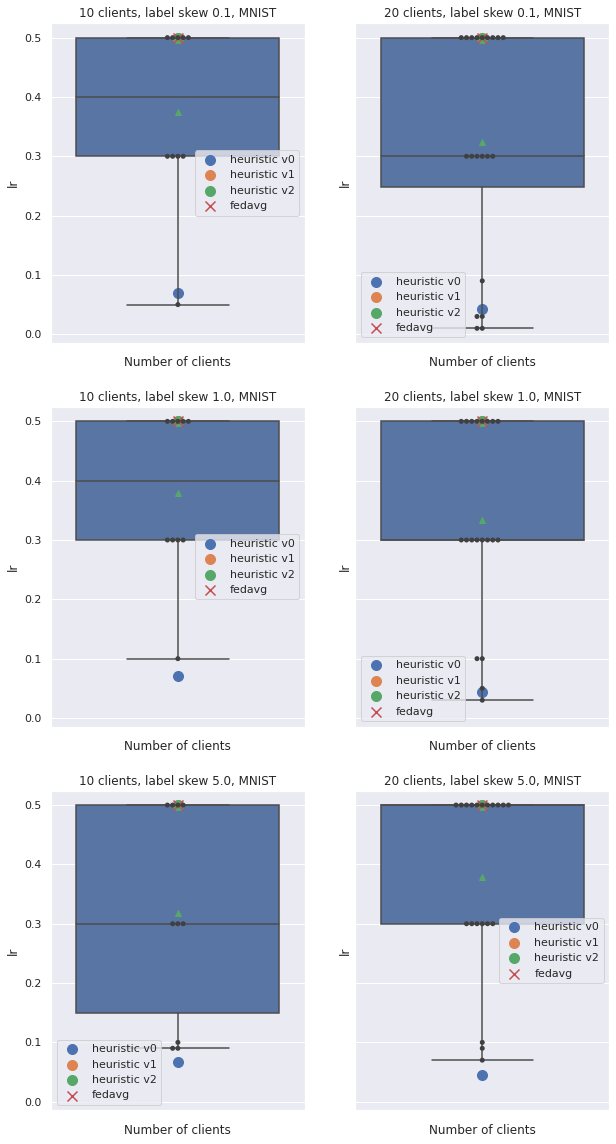

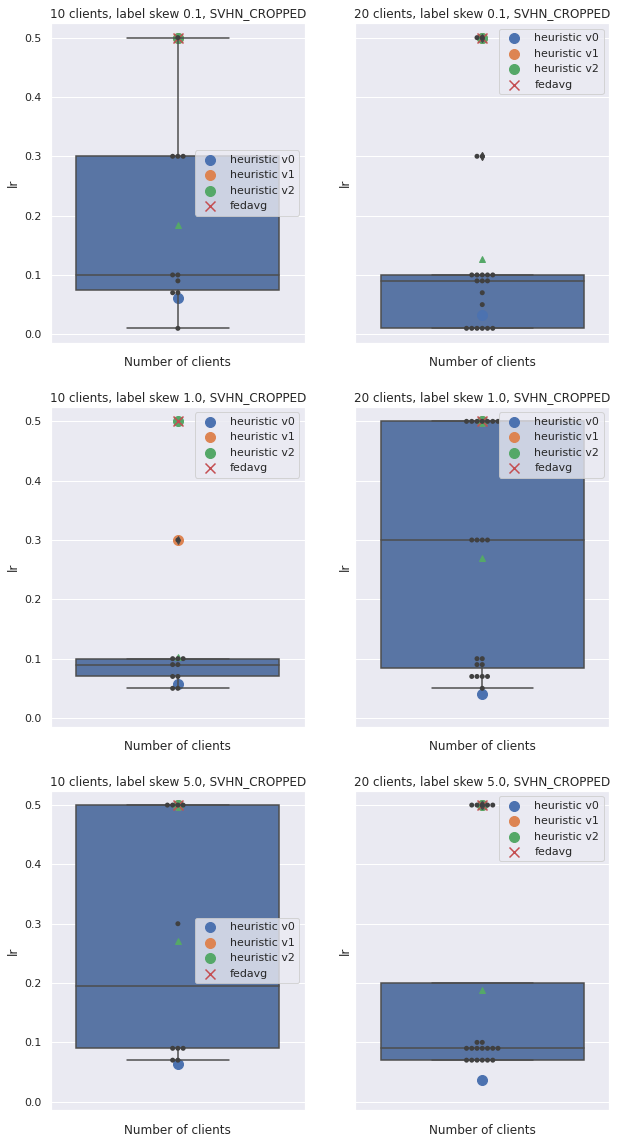

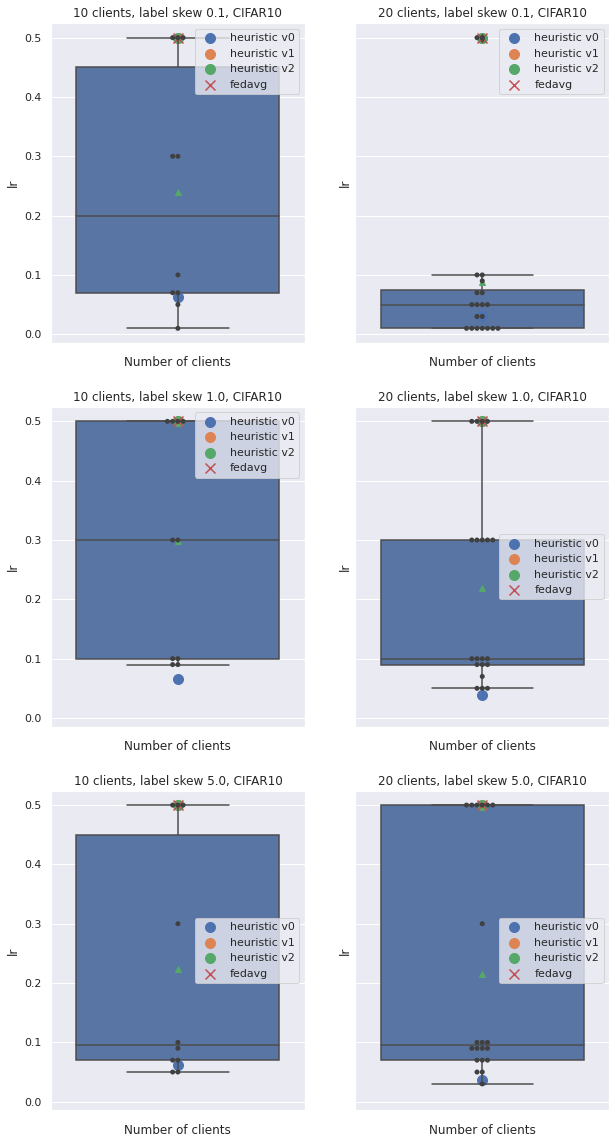

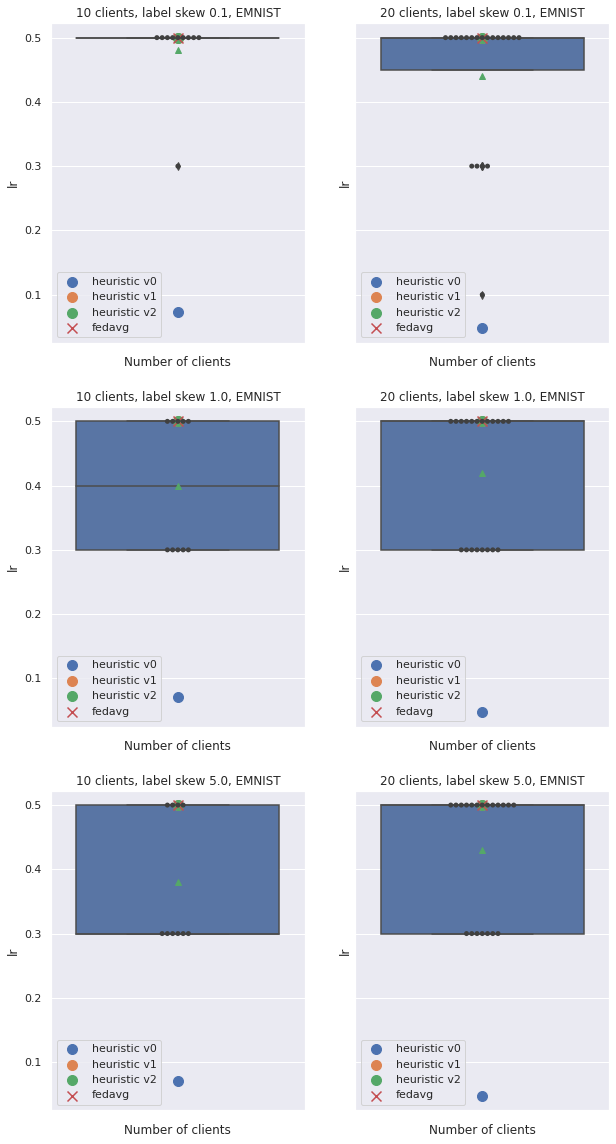

In [9]:
lr_label_heuristic_es = {}
lr_label_baseline_es = {}
lr_label_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, LABEL_SKEWS, NR_PARTIES, "label", "lr", versions=(0, 1, 2)
    )
    lr_label_heuristic_es = sum_dicts(lr_label_heuristic_es, heuristic_es)
    lr_label_baseline_es = sum_dicts(lr_label_baseline_es, baseline_es)
    lr_label_fedavg_results += fedavg_res

In [10]:
print_results(lr_label_heuristic_es, lr_label_baseline_es,
              lr_label_fedavg_results, versions=(0, 1, 2))

([0.3, 0.5, 0.5, 0.5, 0.3, 0.05, 0.3, 0.3, 0.5, 0.5], 0.5)
([0.3, 0.5, 0.3, 0.01, 0.5, 0.5, 0.09, 0.5, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.03, 0.03, 0.3, 0.01, 0.5, 0.5], 0.5)
([0.5, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.1, 0.3], 0.5)
([0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.5, 0.3, 0.5, 0.3, 0.1, 0.3, 0.05, 0.03, 0.5, 0.3], 0.5)
([0.3, 0.3, 0.5, 0.09, 0.09, 0.5, 0.5, 0.3, 0.1, 0.5], 0.5)
([0.1, 0.5, 0.09, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3, 0.5, 0.5, 0.07, 0.5, 0.5, 0.3, 0.5, 0.3, 0.3], 0.5)
([0.3, 0.3, 0.5, 0.09, 0.07, 0.07, 0.1, 0.3, 0.01, 0.1], 0.5)
([0.09, 0.01, 0.01, 0.07, 0.01, 0.5, 0.1, 0.5, 0.05, 0.1, 0.3, 0.01, 0.09, 0.1, 0.09, 0.1, 0.01, 0.01, 0.1, 0.3], 0.5)
([0.05, 0.3, 0.1, 0.05, 0.07, 0.1, 0.1, 0.09, 0.07, 0.09], 0.5)
([0.5, 0.5, 0.09, 0.3, 0.5, 0.07, 0.5, 0.5, 0.07, 0.5, 0.5, 0.1, 0.3, 0.1, 0.07, 0.3, 0.3, 0.09, 0.07, 0.05], 0.5)
([0.3, 0.09, 0.5, 0.07, 0.5, 0.5, 0.09, 0.09, 0.5, 0.07], 0.5)
([0.07, 0.1, 0.5, 0.07, 0.5, 0.07, 0.5, 0.09, 0.5, 0.07, 0.09, 0.09

Comments:
- Optimal server learning rate equals 0.5 for all settings.

### Label skew - Batch Size Results

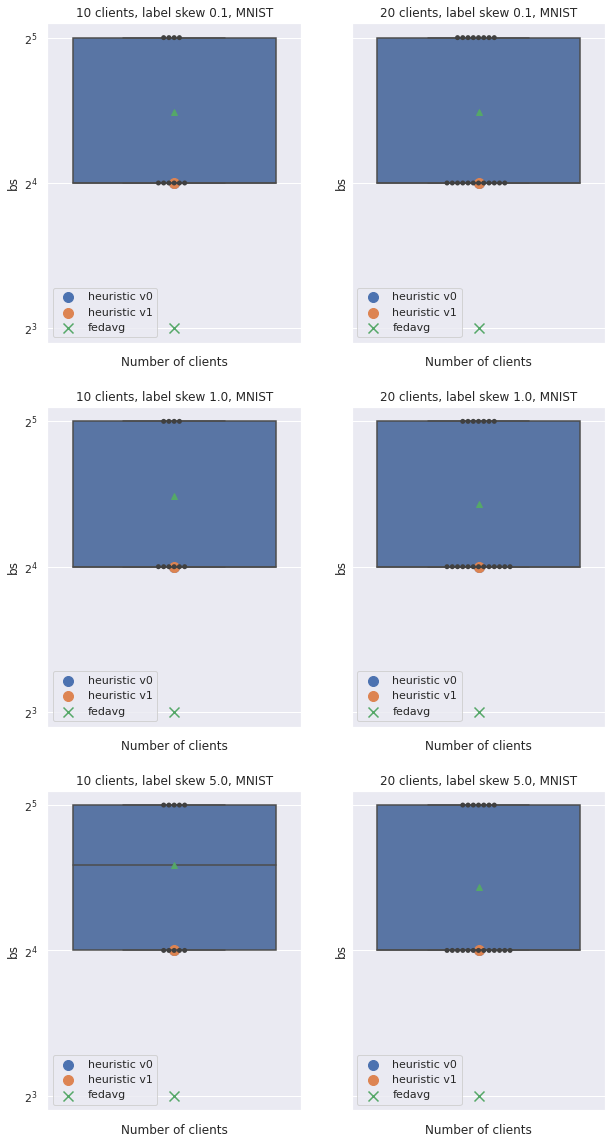

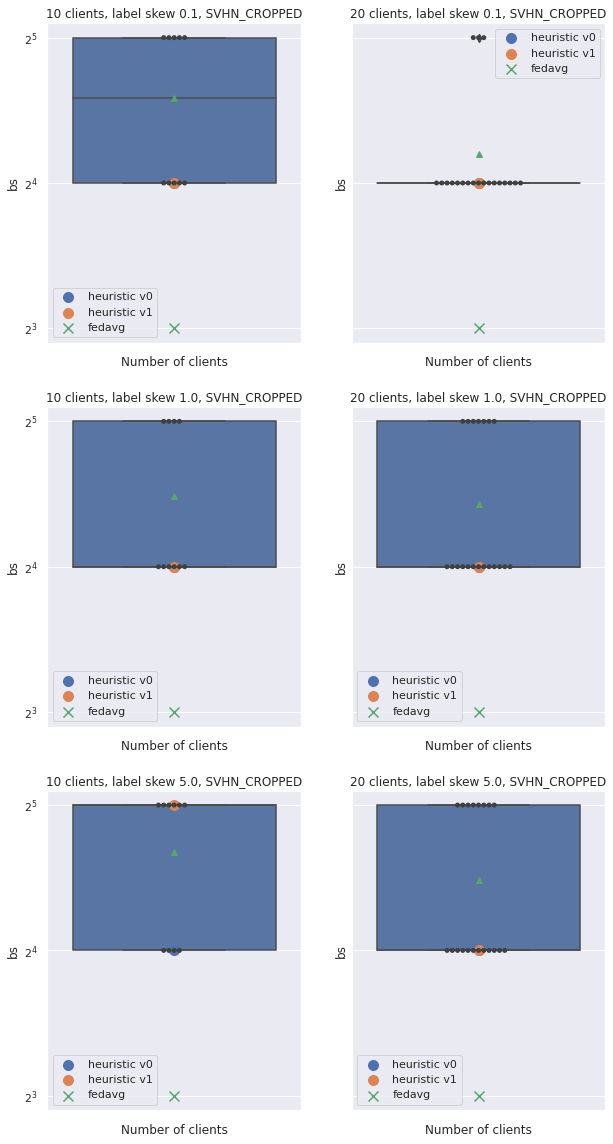

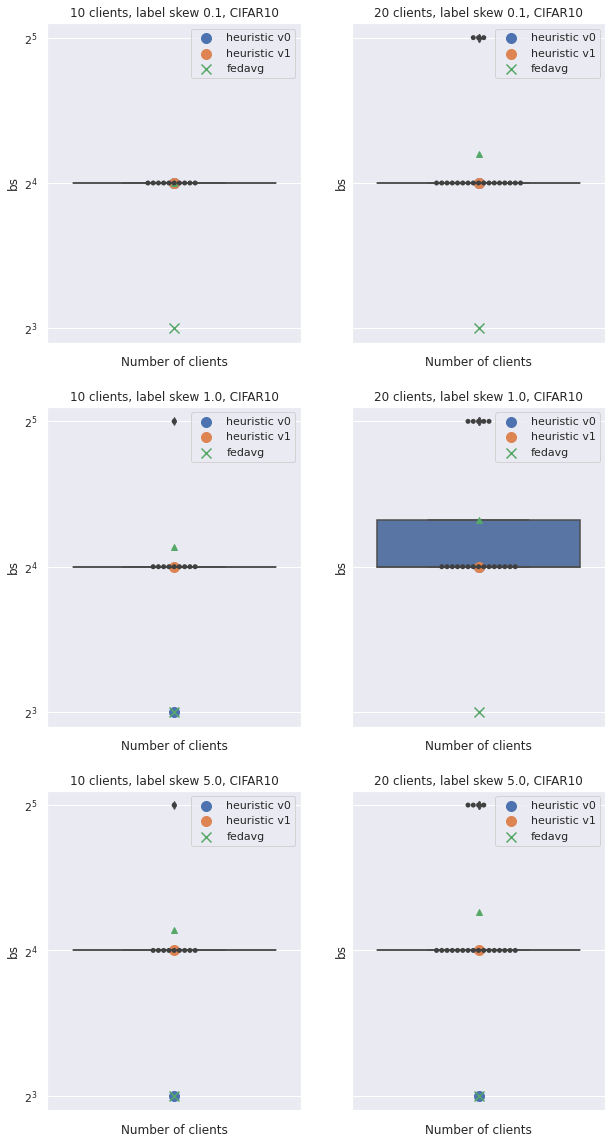

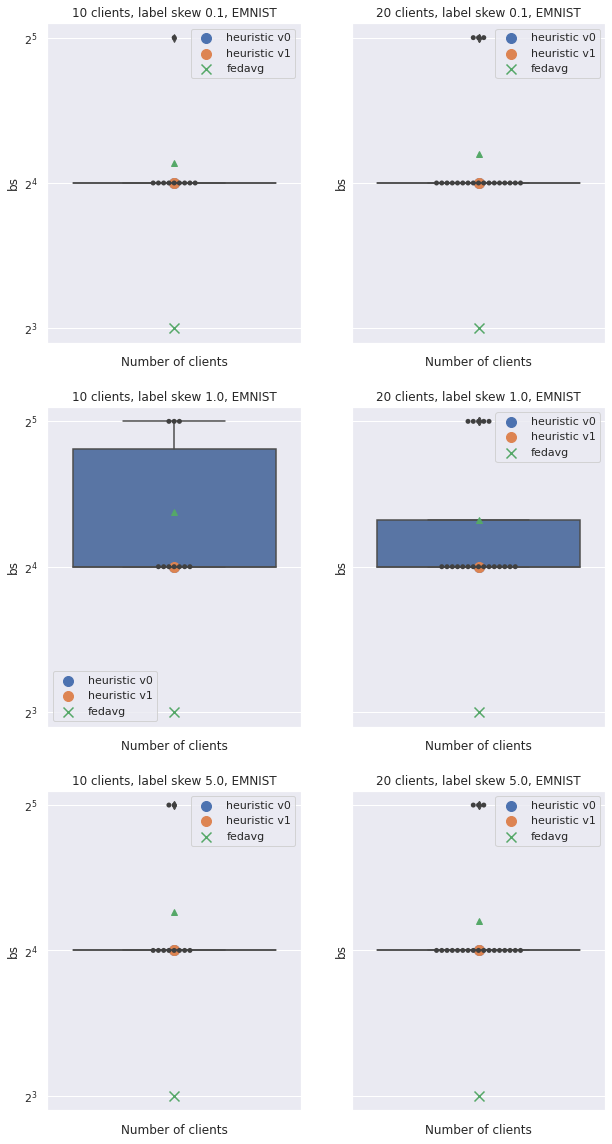

In [11]:
bs_label_heuristic_es = {}
bs_label_baseline_es = {}
bs_label_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, LABEL_SKEWS, NR_PARTIES, "label", "bs",  versions=(0, 1))
    bs_label_heuristic_es = sum_dicts(bs_label_heuristic_es, heuristic_es)
    bs_label_baseline_es = sum_dicts(bs_label_baseline_es, baseline_es)
    bs_label_fedavg_results += fedavg_res

In [12]:
print_results(bs_label_heuristic_es, bs_label_baseline_es,
              bs_label_fedavg_results, versions=(0, 1))

([16, 16, 32, 32, 16, 16, 16, 16, 32, 32], 8)
([16, 16, 32, 16, 16, 16, 32, 32, 32, 16, 32, 16, 32, 32, 16, 32, 16, 16, 16, 16], 8)
([16, 16, 32, 16, 16, 32, 32, 16, 16, 32], 8)
([32, 32, 16, 32, 16, 16, 32, 16, 16, 16, 32, 16, 16, 16, 16, 16, 32, 16, 32, 16], 8)
([32, 16, 32, 16, 16, 16, 32, 16, 32, 32], 8)
([32, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 32, 16, 16, 16, 32, 16, 32, 16, 32], 8)
([16, 32, 16, 32, 16, 32, 32, 16, 16, 32], 8)
([32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16], 8)
([16, 16, 32, 16, 16, 16, 32, 16, 32, 32], 8)
([16, 32, 16, 32, 16, 16, 32, 16, 16, 16, 16, 32, 32, 16, 16, 32, 32, 16, 16, 16], 8)
([32, 32, 16, 16, 32, 16, 32, 32, 16, 32], 8)
([16, 32, 32, 32, 16, 16, 32, 16, 32, 32, 16, 16, 32, 16, 16, 16, 16, 16, 16, 32], 8)
([16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 8)
([16, 16, 32, 32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16], 8)
([16, 16, 16, 16, 32, 16, 16, 16, 16, 16], 8)
([16, 32, 16, 16, 32, 16, 32, 

Comments:
- Optimal fedavg batch size equals 8 (smallest in grid search) for all settings.
- Optimal fedavg batch size consistently smaller than client batch sizes.

### Label skew - Momentum Results

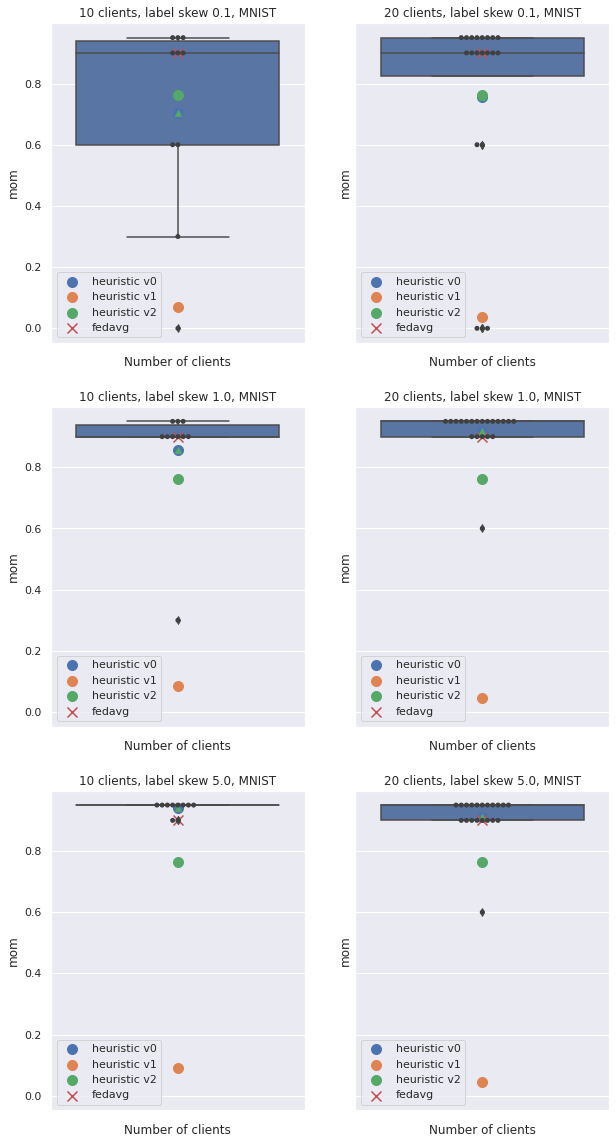

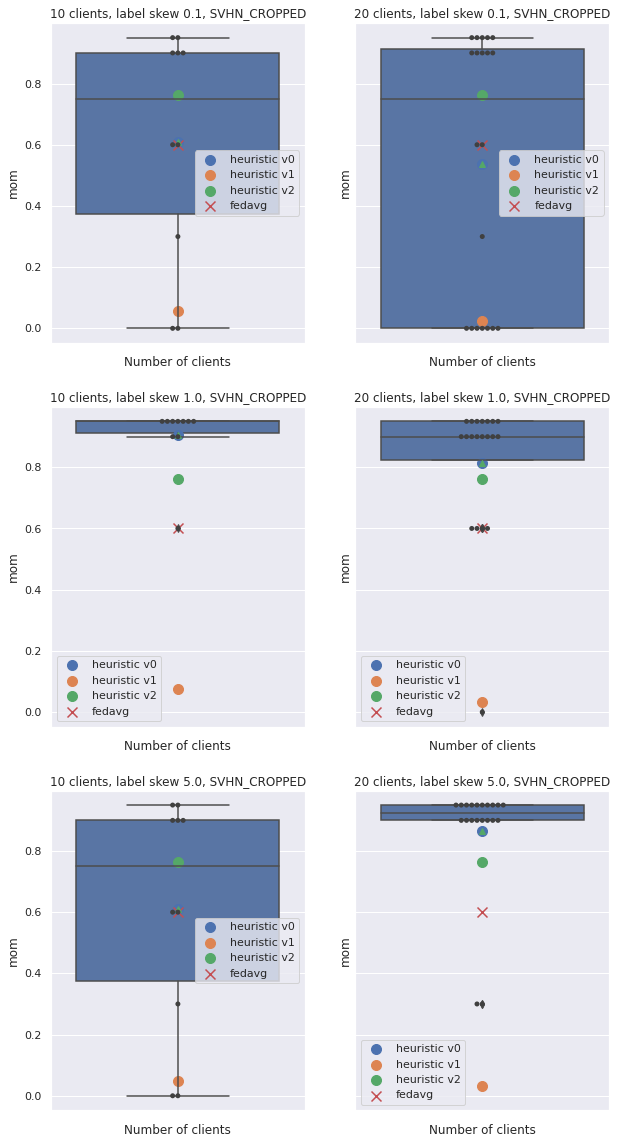

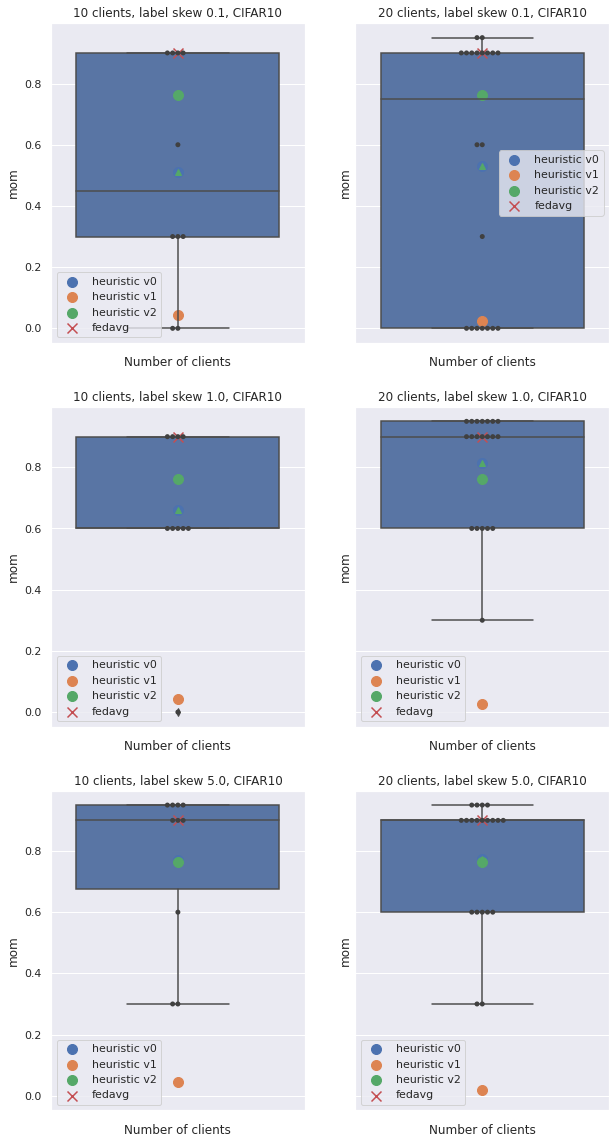

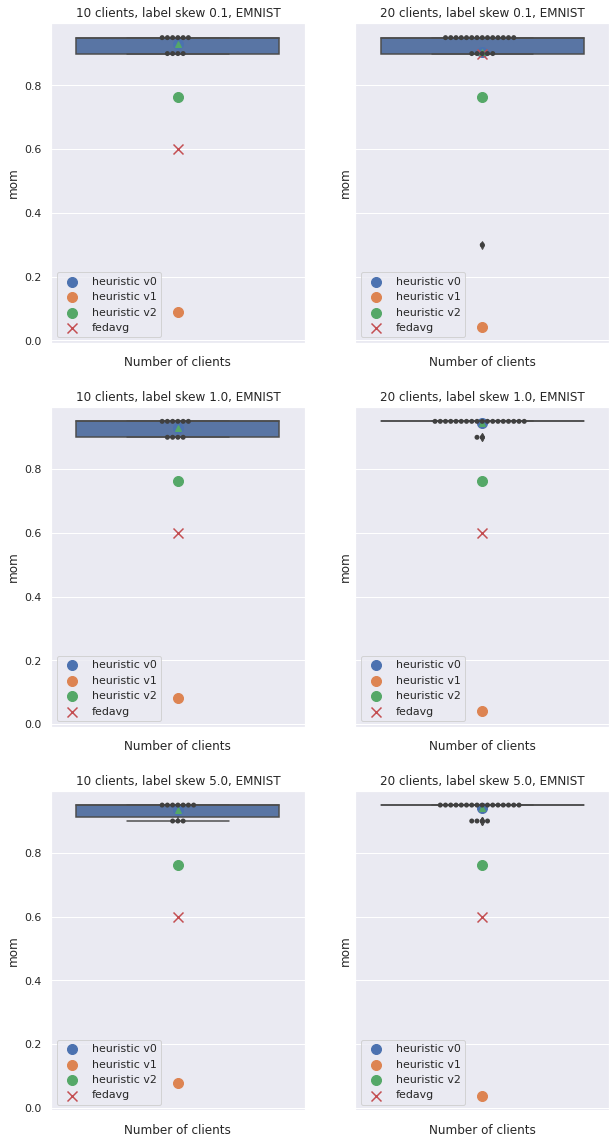

In [13]:
mom_label_heuristic_es = {}
mom_label_baseline_es = {}
mom_label_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, LABEL_SKEWS, NR_PARTIES, "label", "mom", versions=(0, 1, 2))
    mom_label_heuristic_es = sum_dicts(mom_label_heuristic_es, heuristic_es)
    mom_label_baseline_es = sum_dicts(mom_label_baseline_es, baseline_es)
    mom_label_fedavg_results += fedavg_res

In [14]:
print_results(mom_label_heuristic_es, mom_label_baseline_es,
              mom_label_fedavg_results)

([0.9, 0.9, 0.95, 0.95, 0.6, 0.6, 0.9, 0.0, 0.95, 0.3], 0.9)
([0.9, 0.0, 0.95, 0.0, 0.95, 0.6, 0.6, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.9, 0.95, 0.9, 0.0, 0.9, 0.9], 0.9)
([0.3, 0.9, 0.95, 0.95, 0.9, 0.95, 0.9, 0.9, 0.9, 0.9], 0.9)
([0.95, 0.95, 0.9, 0.9, 0.95, 0.95, 0.95, 0.9, 0.95, 0.95, 0.95, 0.95, 0.6, 0.9, 0.95, 0.95, 0.95, 0.95, 0.9, 0.95], 0.9)
([0.9, 0.95, 0.95, 0.95, 0.95, 0.9, 0.95, 0.95, 0.95, 0.95], 0.9)
([0.95, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9, 0.6, 0.9, 0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.9, 0.9, 0.95, 0.95], 0.9)
([0.3, 0.6, 0.6, 0.9, 0.9, 0.95, 0.9, 0.0, 0.0, 0.95], 0.6)
([0.95, 0.0, 0.0, 0.95, 0.0, 0.0, 0.95, 0.3, 0.95, 0.9, 0.6, 0.0, 0.9, 0.9, 0.9, 0.9, 0.0, 0.0, 0.95, 0.6], 0.6)
([0.95, 0.6, 0.95, 0.95, 0.95, 0.9, 0.95, 0.9, 0.95, 0.95], 0.6)
([0.6, 0.9, 0.95, 0.9, 0.0, 0.95, 0.9, 0.6, 0.95, 0.6, 0.6, 0.9, 0.9, 0.95, 0.95, 0.9, 0.9, 0.9, 0.95, 0.95], 0.6)
([0.6, 0.9, 0.0, 0.9, 0.6, 0.3, 0.9, 0.95, 0.0, 0.95], 0.6)
([0.9, 0.95, 0.9, 0.95, 0.3, 0.95, 0.9, 0.

Comments:


## Quantity skew

### Quantity skew - Learning Rate Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


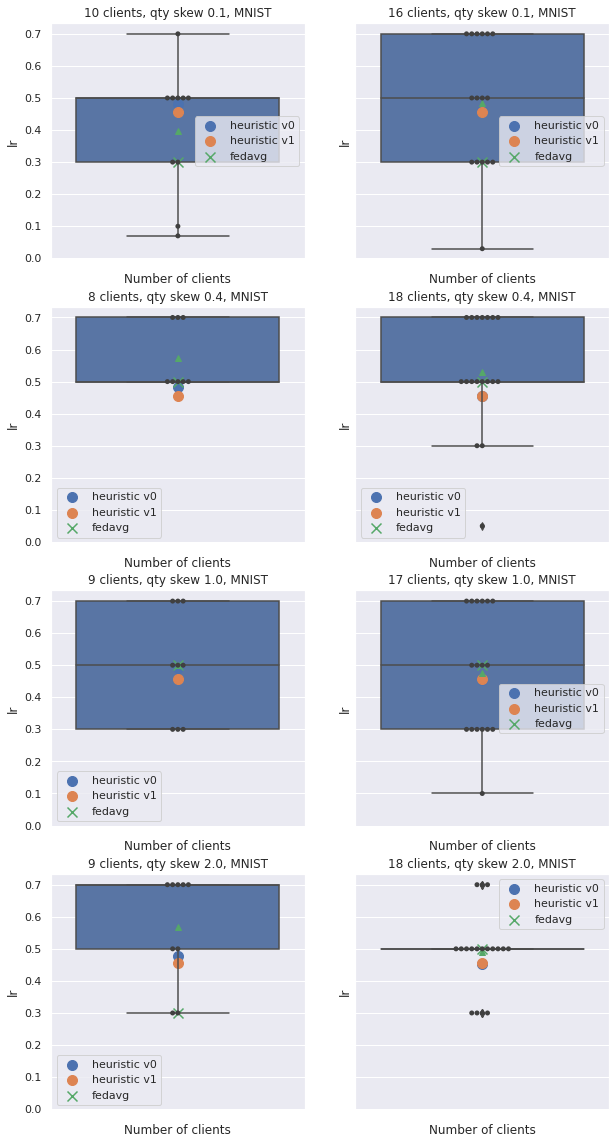

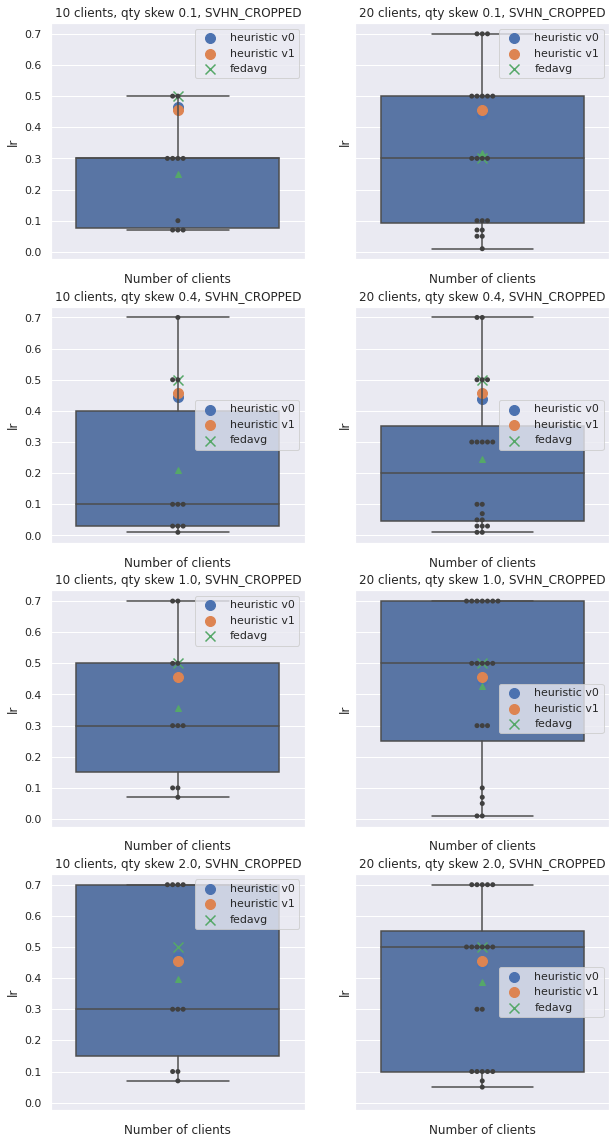

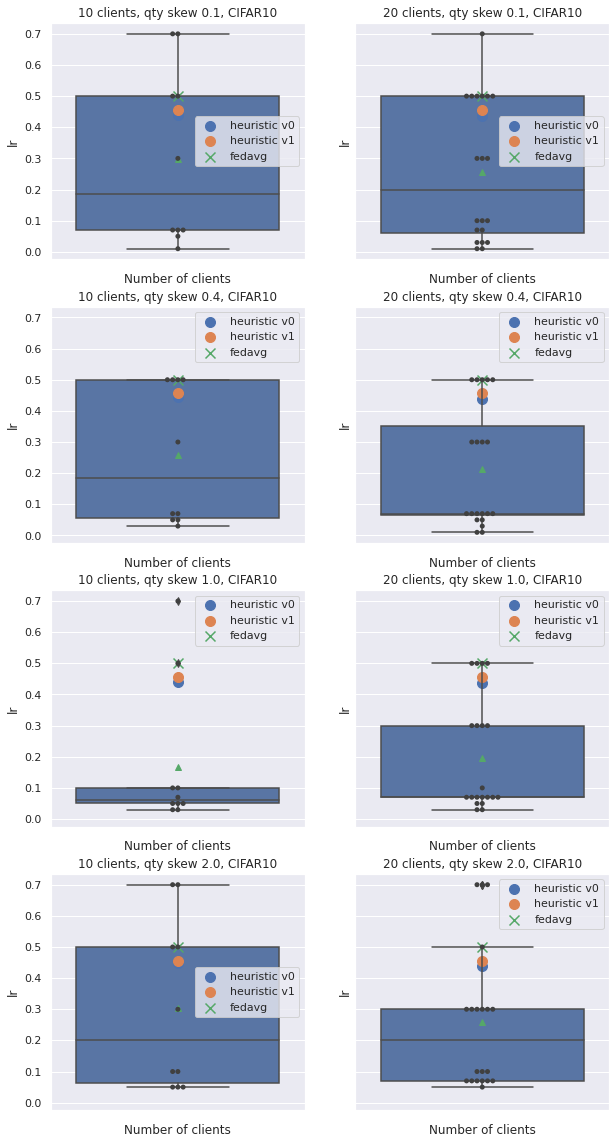

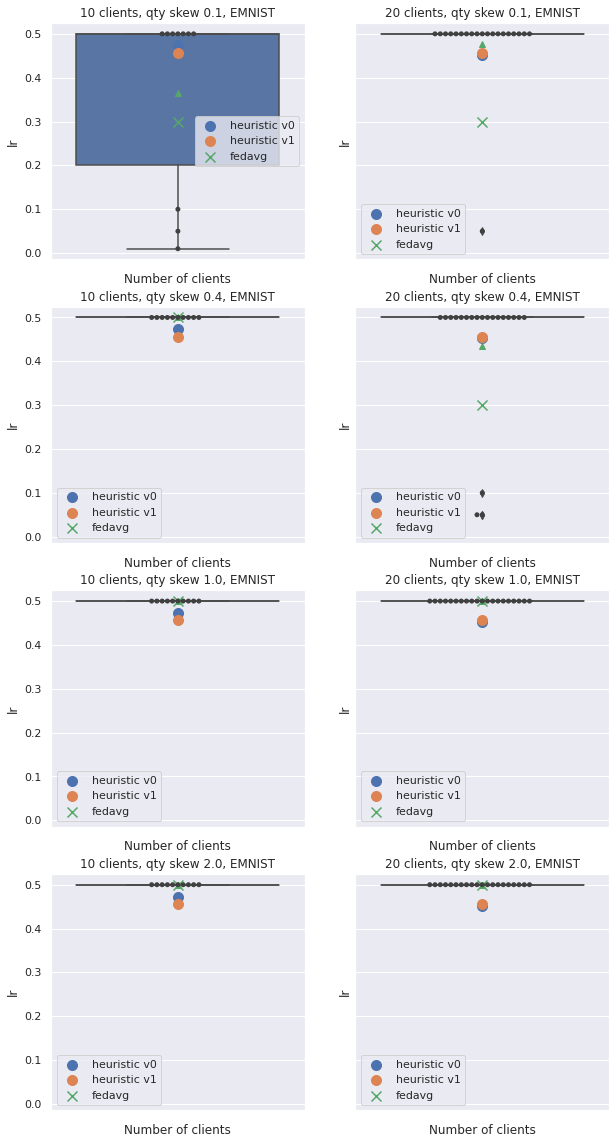

In [15]:
lr_qty_heuristic_es = {}
lr_qty_baseline_es = {}
lr_qty_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, QTY_SKEWS, NR_PARTIES, "qty", "lr", versions=(0, 1))
    lr_qty_heuristic_es = sum_dicts(lr_qty_heuristic_es, heuristic_es)
    lr_qty_baseline_es = sum_dicts(lr_qty_baseline_es, baseline_es)
    lr_qty_fedavg_results += fedavg_res

In [16]:
print_results(lr_qty_heuristic_es, lr_qty_baseline_es, lr_qty_fedavg_results, versions=(0, 1))

([0.3, 0.5, 0.5, 0.5, 0.7, 0.3, 0.5, 0.07, 0.1, 0.5], 0.3)
([0.7, 0.5, 0.5, 0.3, 0.3, 0.7, 0.7, 0.7, 0.3, 0.5, 0.7, 0.03, 0.3, 0.3, 0.5, 0.7], 0.3)
([0.5, 0.7, 0.5, 0.5, 0.5, 0.7, 0.5, 0.7], 0.5)
([0.3, 0.7, 0.7, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.05, 0.3, 0.5, 0.7, 0.5, 0.5, 0.5, 0.5, 0.7], 0.5)
([0.3, 0.5, 0.5, 0.3, 0.5, 0.3, 0.7, 0.7, 0.7], 0.5)
([0.7, 0.3, 0.3, 0.5, 0.7, 0.7, 0.5, 0.3, 0.7, 0.7, 0.3, 0.3, 0.5, 0.5, 0.3, 0.7, 0.1], 0.5)
([0.3, 0.7, 0.7, 0.3, 0.5, 0.7, 0.7, 0.7, 0.5], 0.3)
([0.7, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3, 0.5, 0.3, 0.5, 0.7, 0.5, 0.7], 0.5)
([0.07, 0.1, 0.5, 0.07, 0.5, 0.3, 0.3, 0.3, 0.3, 0.07], 0.5)
([0.1, 0.7, 0.1, 0.07, 0.7, 0.05, 0.3, 0.3, 0.7, 0.5, 0.07, 0.5, 0.05, 0.5, 0.3, 0.01, 0.5, 0.1, 0.3, 0.5], 0.3)
([0.7, 0.03, 0.1, 0.03, 0.5, 0.1, 0.5, 0.1, 0.03, 0.01], 0.5)
([0.03, 0.1, 0.7, 0.3, 0.1, 0.03, 0.5, 0.7, 0.3, 0.3, 0.03, 0.01, 0.5, 0.01, 0.3, 0.5, 0.3, 0.07, 0.05, 0.05], 0.5)
([0.5, 0.3, 0.3, 0.07, 0.7, 0.3, 0.1, 0.7, 0.1, 0.5], 0.

Comments:


### Quantity skew - Batch Size Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


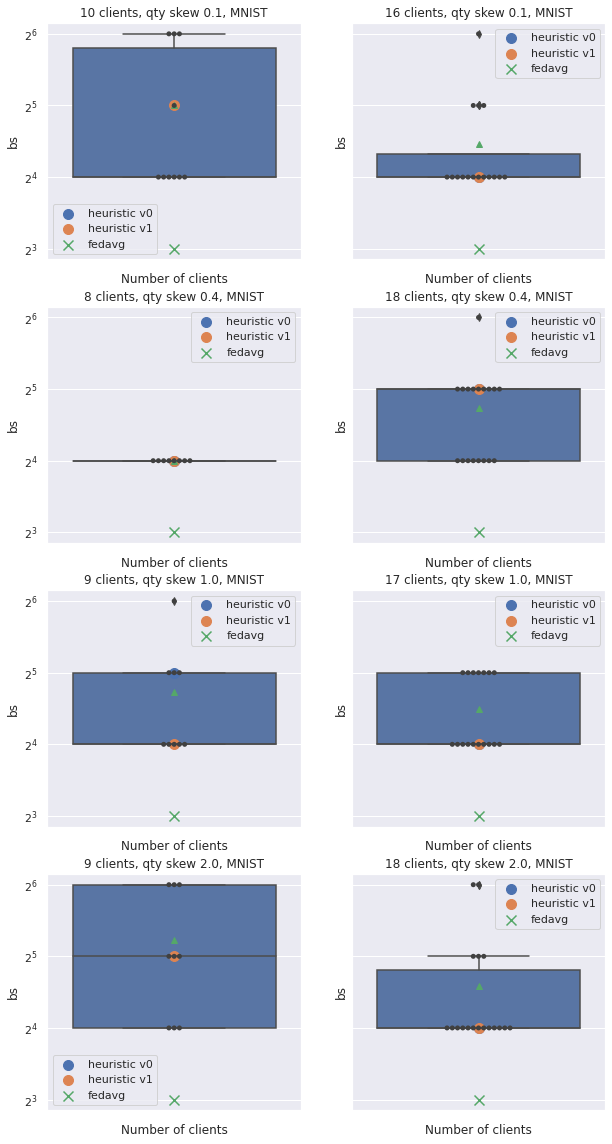

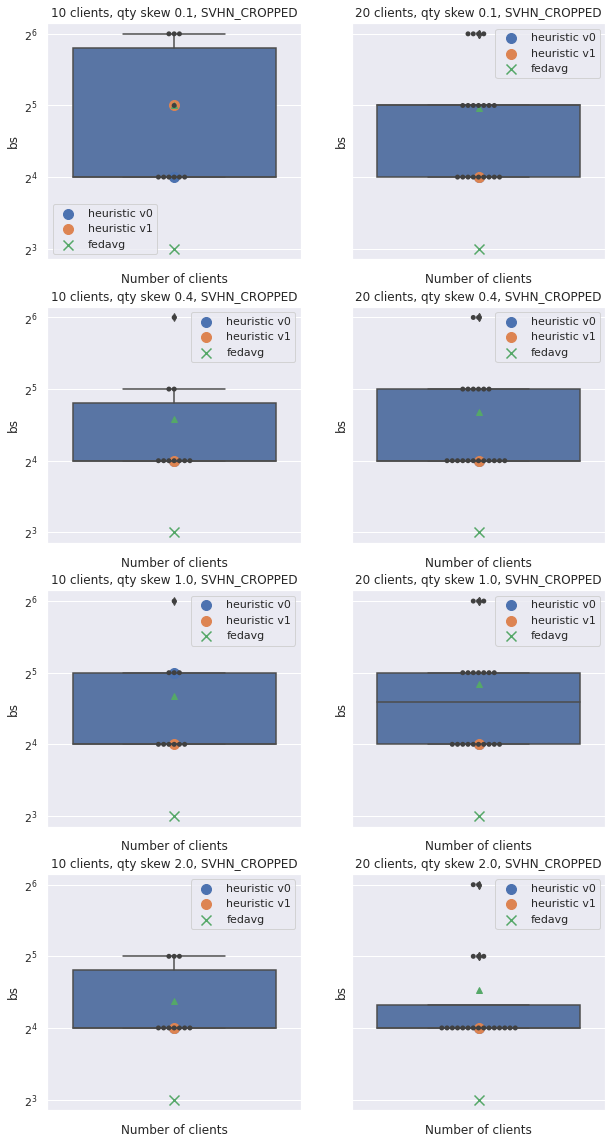

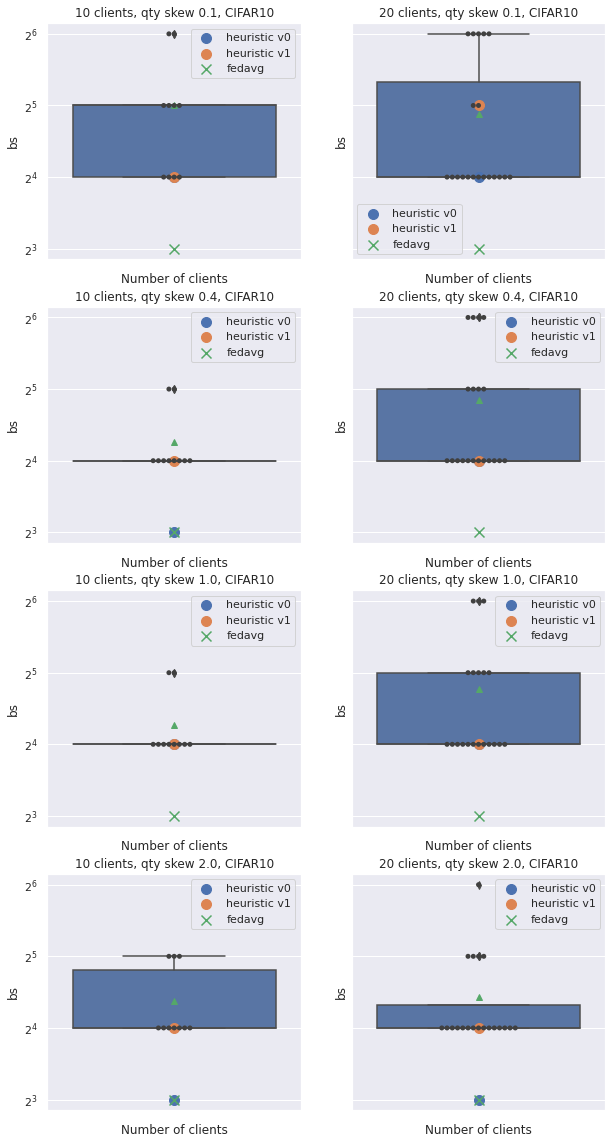

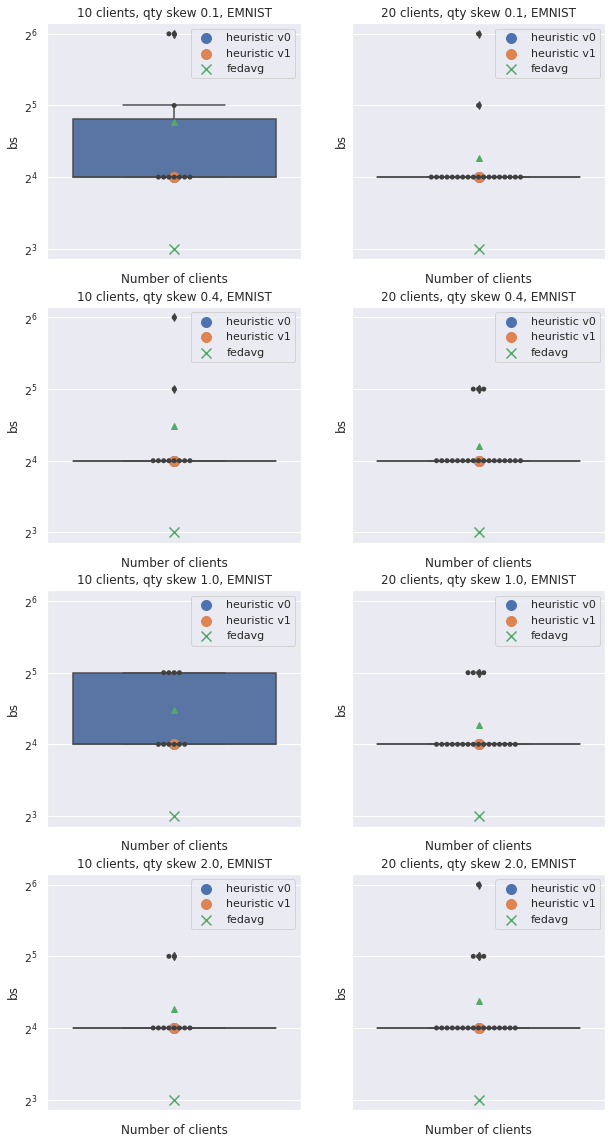

In [17]:
bs_qty_heuristic_es = {}
bs_qty_baseline_es = {}
bs_qty_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, QTY_SKEWS, NR_PARTIES, "qty", "bs", versions=(0, 1))
    bs_qty_heuristic_es = sum_dicts(bs_qty_heuristic_es, heuristic_es)
    bs_qty_baseline_es = sum_dicts(bs_qty_baseline_es, baseline_es)
    bs_qty_fedavg_results += fedavg_res

In [18]:
print_results(bs_qty_heuristic_es, bs_qty_baseline_es, bs_qty_fedavg_results,
              versions=(0, 1))

([32, 16, 16, 16, 64, 16, 64, 16, 64, 16], 8)
([16, 16, 32, 16, 16, 16, 16, 32, 32, 16, 16, 16, 16, 16, 16, 64], 8)
([16, 16, 16, 16, 16, 16, 16, 16], 8)
([16, 32, 16, 16, 32, 32, 32, 16, 64, 32, 32, 16, 32, 16, 16, 32, 16, 32], 8)
([32, 16, 16, 16, 16, 32, 64, 32, 16], 8)
([16, 16, 32, 32, 16, 16, 16, 16, 32, 16, 32, 16, 16, 32, 16, 32, 32], 8)
([16, 32, 64, 32, 16, 64, 16, 64, 32], 8)
([16, 16, 16, 32, 16, 64, 16, 16, 16, 16, 32, 16, 16, 16, 16, 32, 16, 64], 8)
([16, 16, 64, 64, 16, 16, 32, 64, 16, 16], 8)
([32, 16, 64, 32, 16, 32, 32, 32, 16, 64, 16, 16, 16, 32, 16, 64, 16, 16, 32, 64], 8)
([16, 16, 16, 64, 16, 16, 32, 32, 16, 16], 8)
([16, 16, 16, 32, 16, 32, 16, 16, 32, 16, 16, 16, 64, 16, 64, 16, 32, 32, 32, 16], 8)
([16, 16, 64, 16, 32, 16, 32, 16, 32, 16], 8)
([16, 16, 64, 32, 16, 16, 64, 16, 32, 16, 16, 16, 32, 16, 16, 32, 32, 64, 32, 32], 8)
([16, 16, 16, 16, 32, 32, 16, 16, 32, 16], 8)
([16, 64, 16, 16, 32, 16, 16, 16, 16, 16, 32, 64, 16, 16, 16, 16, 16, 32, 16, 16], 8)
([16

Comments:
- Optimal server batch size equals 8 for all settings.
- Optimal fedavg batch size consistently smaller than client batch sizes.

### Quantity skew - Momentum Results

File for client 16 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 17 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 18 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.1', 20, 'qty') does not exist.
File for client 8 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 9 in MNIST ('0.4', 10, 'qty') does not exist.
File for client 18 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 19 in MNIST ('0.4', 20, 'qty') does not exist.
File for client 9 in MNIST ('1.0', 10, 'qty') does not exist.
File for client 17 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 18 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('1.0', 20, 'qty') does not exist.
File for client 9 in MNIST ('2.0', 10, 'qty') does not exist.
File for client 18 in MNIST ('2.0', 20, 'qty') does not exist.
File for client 19 in MNIST ('2.0', 20, 'qty') does not exist.


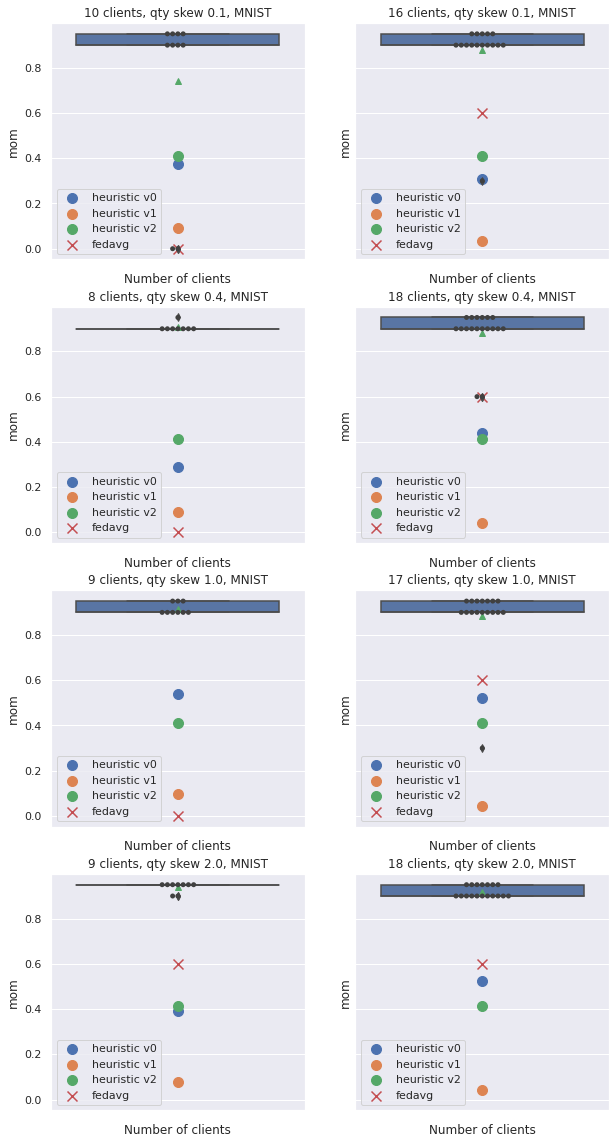

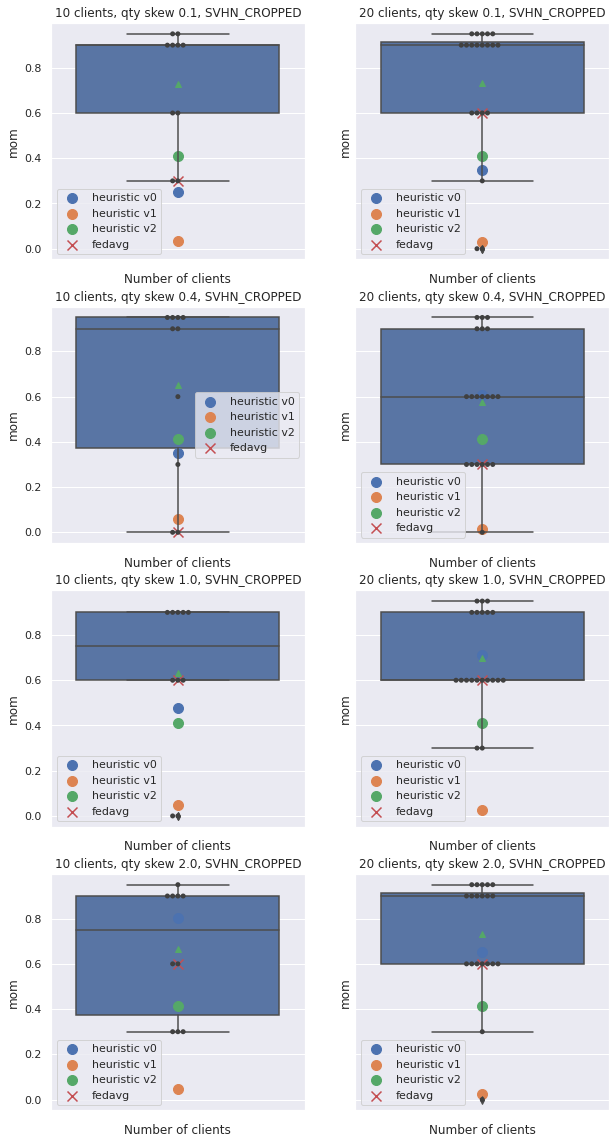

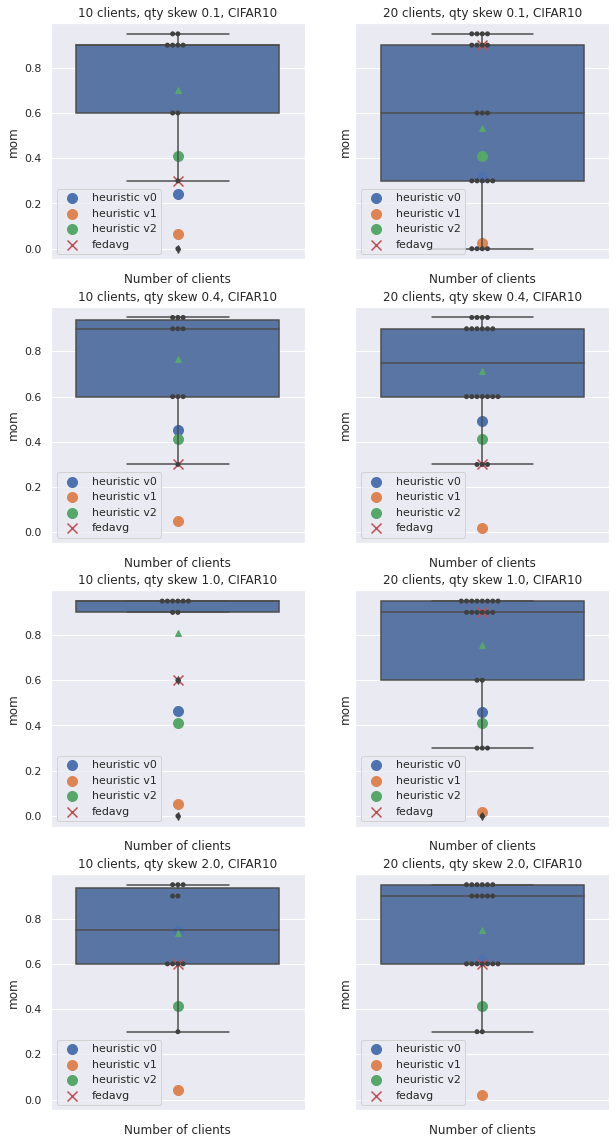

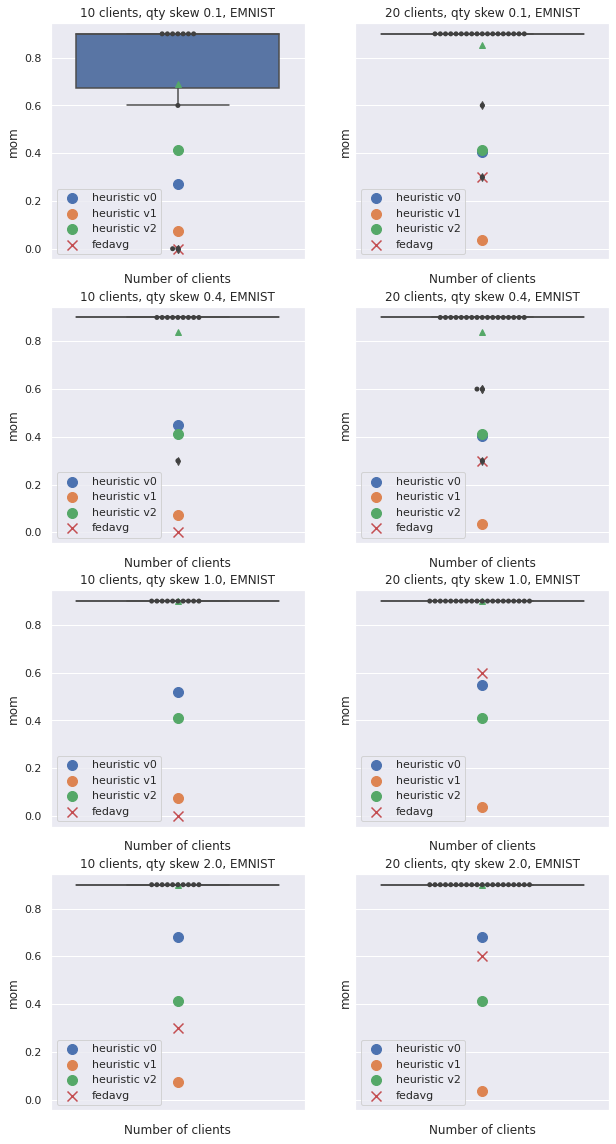

In [19]:
mom_qty_heuristic_es = {}
mom_qty_baseline_es = {}
mom_qty_fedavg_results = []

for d in DATASETS:
    heuristic_es, baseline_es, fedavg_res = plot_results(
        d, QTY_SKEWS, NR_PARTIES, "qty", "mom", versions=(0, 1, 2))
    mom_qty_heuristic_es = sum_dicts(mom_qty_heuristic_es, heuristic_es)
    mom_qty_baseline_es = sum_dicts(mom_qty_baseline_es, baseline_es)
    mom_qty_fedavg_results += fedavg_res

In [20]:
print_results(mom_qty_heuristic_es, mom_qty_baseline_es,
              mom_qty_fedavg_results)

([0.95, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.0, 0.0, 0.9], 0.0)
([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9, 0.9, 0.9, 0.3], 0.6)
([0.95, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9], 0.0)
([0.9, 0.9, 0.9, 0.9, 0.9, 0.95, 0.9, 0.6, 0.95, 0.6, 0.95, 0.95, 0.9, 0.9, 0.9, 0.95, 0.9, 0.95], 0.6)
([0.95, 0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.9, 0.9], 0.0)
([0.9, 0.9, 0.95, 0.95, 0.9, 0.9, 0.9, 0.95, 0.9, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.3], 0.6)
([0.95, 0.95, 0.95, 0.95, 0.9, 0.95, 0.9, 0.95, 0.95], 0.6)
([0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.9, 0.95, 0.9, 0.9, 0.9, 0.95], 0.6)
([0.9, 0.95, 0.95, 0.9, 0.3, 0.9, 0.6, 0.3, 0.6, 0.9], 0.3)
([0.9, 0.0, 0.95, 0.9, 0.6, 0.95, 0.0, 0.6, 0.3, 0.9, 0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.6, 0.9, 0.9, 0.6], 0.6)
([0.0, 0.95, 0.9, 0.9, 0.6, 0.3, 0.95, 0.95, 0.95, 0.0], 0.0)
([0.3, 0.9, 0.0, 0.3, 0.9, 0.6, 0.6, 0.3, 0.6, 0.3, 0.6, 0.9, 0.3, 0.6, 0.95, 0.3, 0.6, 0.6, 0.95, 0.95], 0.3)
([0.0, 0.9, 0.9, 0.9, 0.6

Comments: